based on 
https://www.kalmanfilter.net/book.html

# introduction
1. Background
- Mean and expected value
- variance and standard variation
- Normal distribution
- Random variables
- Estimate,accuracy and precision
- Summary
2. The alph-beta-gamma filter
- examples
3. Kalman filter in one dimension
- one dimensional kalman filter without process noise
- example -estimated height of a building
4. adding process noise
- the complete model of one-dimensional kalman-filter
- examples
# multivariate kalman filter
1. foreword
2. background
 - matrix operations
 - expectation rules
 - multivariate normal distribution
3. state extrapolation equation
- examples
- state extrapolation equation dimension
- linear time-invariant systems
4. modeling linear dynamics systems
- derivation of the state extrapolation equation
- the state space representation
- solving the differential equation
5. covariance extrapolation
- the estimate covariance without process noise
- constructing the process noise matrix Q
6. measurement equation
- the observation matrix H
- measuremnt equation dimensions
7. interim summary
- prediction equations
- auxilliary equations
8. state update equation
- state update equation dimensions
9. covariance update equation
- covariance update equation derivation
10. the kalman gain
- KALMAN GAIN EQUATION DERIVATION
11. SIMPLIFIED COVARIANCE UPDATE EQUATION
12. summary
13. examples
- VEHICLE LOCATION ESTIMATION
- ROCKET ALTITUDE ESTIMATION

## Bckground

### Mean and expected value

- Mean - $\mu$
- Expected value - E
#### Mean

when all the system states(values) are known and we use all of them, for example 5 coin values mean value.

**Mean**: $V_{mean}=\frac{1}{N}\sum_{n=1}^{N}V_{n}$

#### Expected value

when we estimates some states based on measurements (probably with some error), for example averaging person weight(unknown) based on 5 scale measurements(contains some measurement error)

**Expected value**: $W=\frac{1}{N}\sum_{n=1}^{N}W_{n}$

W is an estimation of the system state, The outcome of the estimate is the expected value of the weight.

**The expected value** is the value you would expect your hidden variable to have over a long time or many trials.

### Variance and standard deviation

- variance - $\sigma^{2}$
- standard deviation - $\sigma$
#### Variance
The Variance is a measure of the spreading of the data set from its mean.

**basically its just the sum of the distances of the measurements in the system from the mean, squared to get rid of the distance sign factor**

$\sigma^{2}=\frac{1}{N}\sum_{n=1}^{N}(x_{n}-\mu)^{2}$


#### Standard Deviation
The Standard Deviation is the square root of the variance.

$\sigma=\sqrt{\frac{1}{N}\sum_{n=1}^{N}(x_{n}-\mu)^{2}}$

**to get the same unit as our system states we square the variance**

##### Mean and Variance estimation
In that case we need to get big enough data-set, and the variance estimation looks like so

$\sigma^{2}=\frac{1}{N-1}\sum_{n=1}^{N}(x_{n}-\mu)^{2}$

* **N-1(instead of N) is calld Bassel's correction**

### Normal distribution
Normal or Gaussian distribution are common in many natural phenomena.

$f(x:\mu,\sigma^{2})=\frac{1}{\sqrt{2\pi\sigma}}*e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$

the curve describing the distribution is known as **PDF(Probability Density Function)**

we can see in the picture below:
* 68.26 % of the samples are in the range of $(\mu-\sigma, \mu+\sigma)$
* 95.44 % of the samples are in the range of $(\mu-2\sigma, \mu+2\sigma)$
* 99.74 % of the samples are in the range of $(\mu-3\sigma, \mu+3\sigma)$

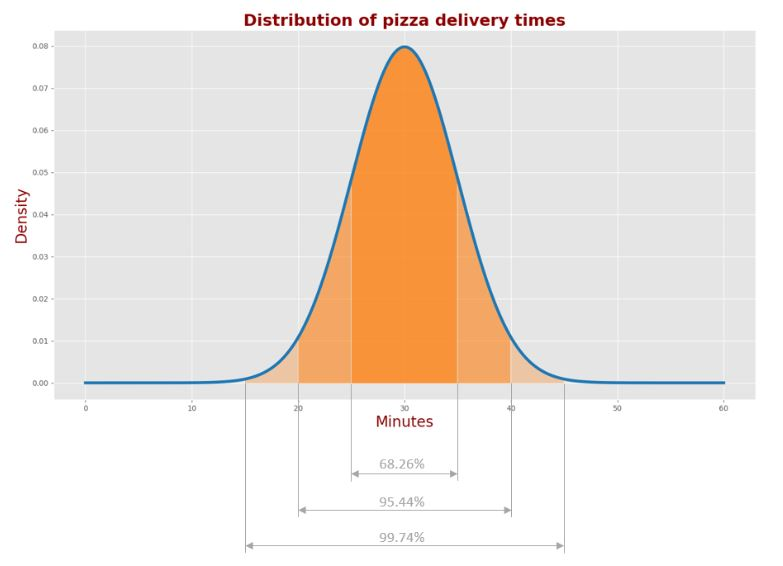

### Random variables
* a random variable describes a hidden state of a system, **its a set of possible values from a random experiment**.
* could be discrete or continuous
* it will be described by its PDF(which is described by **moments**)

#### Moments
Moments are expected values of powers of a random variable.

The $k^{th}$ **raw moment** is $E(X^{k})$(E is expected value).

The $k^{th}$ **central moment**(expected value of the power of the random variable about its mean) is $E((X-\mu*X)^{k})$.

to characterized random variables we will use:
1. the **first raw moment-E(X)**, the mean of the sequence of measurements.
2. the **second central moment-$E((X-\mu*X)^{2})$**, the variance of the sequence of measurements.

### Estimate, accuracy and precision

#### Estimate
An Estimate is about evaluating the hidden state of the system. . Every measured or computed parameter is an estimate.

#### Accuracy
indicates how close the measurement is to the true value.

The offset between the mean of the measurements(expected value) and the true value is the accuracy of the measurements, also known as bias or systematic measurement error.

**Low-accuracy systems are called biased**

#### Precision
describes the variability in a series of measurements of the same parameter - **High precision==low variance**

The dispersion of the distribution is the measurement precision, also known as the measurement noise, random measurement error, or measurement uncertainty.

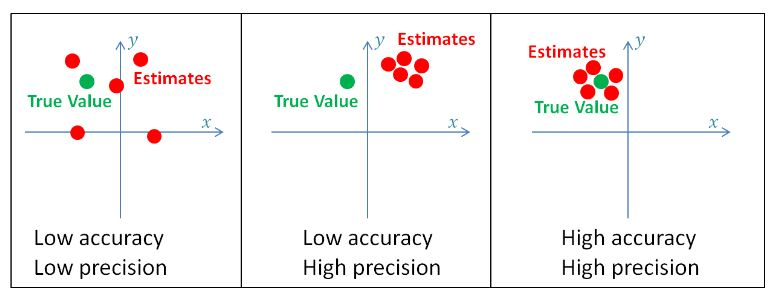

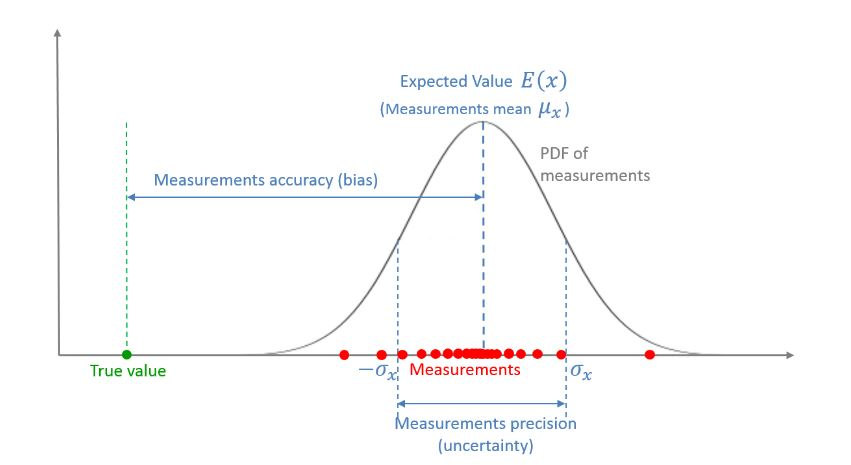

### types of noises

#### white noise


Quantization Noise, Random Walk, Bias
Instability, Rate Random Walk and Rate Ramp

Accuracy: how closely a measured value approximates the real value.

Precision: how closely measured values cluster around a best estimate of the real
value. A precise measurement has a small standard deviation, but can
be of low accuracy!

Resolution: the level or amplitude of the smallest change in measured value.
In general, instruments change their output in a stepwise fashion, and the relationship
between the minimum step size and the full scale output is referred to as resolution.

Threshold: the minimum change in input that causes a change in output.

Repeatability: agreement between measurements taken under identical conditions.
Given as 1% of Full Scale Output (FSO).

Reproducibility: agreement between different measurements of the same phenomenum. 

## The $\alpha-\beta-\gamma$ filter
These filters are frequently used for time series data smoothing.

### Notation

* $\hat{x}_{n,n}=\frac{1}{n}(z_{1}+z_{2}+..z_{n-1}+z_{n})$
* $x$ - true value
* $z_{n}$ - measured value at time n
* $\hat{x}_{n,n}$ - estimation of x at time n, after taking measurement in time n
* $\hat{x}_{n+1,n}$ - estimation of future x at time n+1, made in time n, predicted state or extrapolated state.
* $\hat{x}_{n-1,n-1}$ - estimation of x at time n-1, after taking measurement in time n-1
* $\hat{x}_{n, n-1}$ - a prior prediction - the estimate of the state at time n, The prediction is made at the time n−1

**in a static system**: $\hat{x}_{n+1,n}=\hat{x}_{n,n}$

In practice we wont recalculate the estimation from all previous samples(too much memory needed). 

instead:
* Estimate the current state based on the measurement and prior prediction.
* Predict the next state based on the current state estimate using the Dynamic Model.

**will modify the averaging equation, to be more feasible**

$\hat{x}_{n,n}=\frac{1}{n}\sum_{i=1}^{n}z_{i}=$

$\frac{1}{n}(\sum_{i=1}^{n-1}z_{i} +z _{n})=$

$\frac{1}{n}(\sum_{i=1}^{n-1}z_{i})+ \frac{1}{n}z_{n}=$

$\frac{1}{n}\frac{n-1}{n-1}(\sum_{i=1}^{n-1}z_{i})+ \frac{1}{n}z_{n}=$

$\frac{n-1}{n}(\frac{1}{n-1}(\sum_{i=1}^{n-1}z_{i}))+ \frac{1}{n}z_{n}=$

$\frac{n-1}{n}(\hat{x}_{n-1,n-1})+ \frac{1}{n}z_{n}=$

$\hat{x}_{n-1,n-1}-\frac{1}{n}\hat{x}_{n-1,n-1}+ \frac{1}{n}z_{n}=$

**and finally**:
$\hat{x}_{n-1,n-1}+\frac{1}{n}(z_{n}-\hat{x}_{n-1,n-1})$

**now lets try to find the future prdicted state** $\hat{x}_{n, n-1}$: 

because the system is static($\hat{x}_{n,n-1}=\hat{x}_{n-1,n-1}$) :

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+\frac{1}{n}(z_{n}-\hat{x}_{n,n-1})$

**we call** $\hat{x}_{n,n}=\hat{x}_{n,n-1}+\frac{1}{n}(z_{n}-\hat{x}_{n,n-1})$ **state update equation**

**In words**:

current-state-estimate **=** predicted-value-of-the-current-state **+** "factor" $\times$ **(** new-measurement **-** predicted-value-of-the-current-state **)**

**the "factor" is called the kalman gain, and could change between time-stamps**

but for know will call the "factor" $\alpha_{n}$:

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+\alpha_{n}(z_{n}-\hat{x}_{n,n-1})$

**we call** $(z_{n}-\hat{x}_{n,n-1})$ **"measurement residual" or "innovation"**

* when $\alpha=\frac{1}{n}, \alpha$ decreases in time, the first measurment(n=1) scaled very high and the scaling decreases in time   

### Estimation algorithm

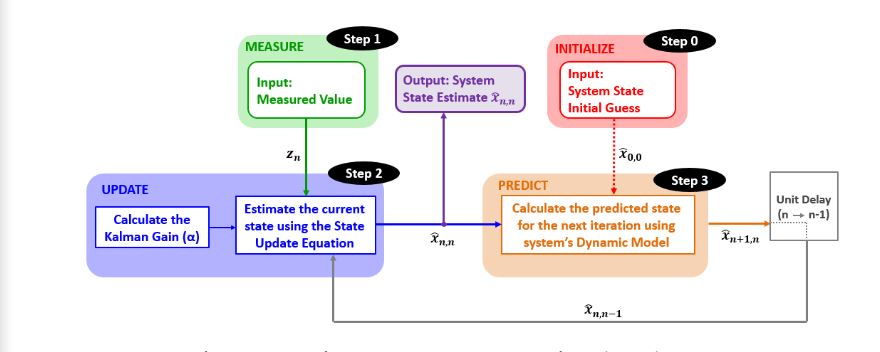

### simple implementation for static system

In [1]:
# imlementaion

## estimations and measurements
x_estimated=[]
x_predicted=[]
measurements=[996,994,1021,1000,1002,1010,983,971,993,1023]

## initial guest
x_estimated.append(1000) #[g]

## initial prediction for "static" system 


## estimate
for i in range(len(measurements)):
    
    # predict
    x_predicted.append(x_estimated[-1])
    
    # state update
    xp0=x_predicted[-1]
    mes1=measurements[i]
    gain=1/(i+1)
    xe1=xp0+gain*(mes1-xp0)
    x_estimated.append(xe1)
    print('iter= ',i,', x_est=',"{0:0.2f}".format(x_estimated[-1]),', x_pred=',"{0:0.2f}".format(x_predicted[-1]))


iter=  0 , x_est= 996.00 , x_pred= 1000.00
iter=  1 , x_est= 995.00 , x_pred= 996.00
iter=  2 , x_est= 1003.67 , x_pred= 995.00
iter=  3 , x_est= 1002.75 , x_pred= 1003.67
iter=  4 , x_est= 1002.60 , x_pred= 1002.75
iter=  5 , x_est= 1003.83 , x_pred= 1002.60
iter=  6 , x_est= 1000.86 , x_pred= 1003.83
iter=  7 , x_est= 997.12 , x_pred= 1000.86
iter=  8 , x_est= 996.67 , x_pred= 997.12
iter=  9 , x_est= 999.30 , x_pred= 996.67


### the $\alpha - \beta$ filter
In the case where the prediction(from the state model) and
the measurement conflict, for example in the radar range dynamics in the example below:

will write the state update equation for the velocity:

$\hat{\dot{x}}_{n,n}=\hat{\dot{x}}_{n,n-1}+\beta(\frac{z_{n}-\hat{x}_{n,n-1}}{dt})$

The value of the factor β depends on the precision level of the radar.

for example:
* estimated velocity is 40[m/s]
* lets say that from the prediction at time n we got 30200[m]
* and from the measurement we got 30110[m].
* 90 meters gap, this gap is either by un-precise radar measurements or by the "wrong model"(velocity had changed).
* lets say that the $1\sigma$ precision of the radar is 20 [m], in that case the change is mainly due to error in the prediction.

if the $\beta=0.9$, than:

$\hat{\dot{x}}_{n,n}=\hat{\dot{x}}_{n,n-1}+\beta(\frac{z_{n}-\hat{x}_{n,n-1}}{dt})=$

$40+0.9(\frac{30110-30200}{5})=23$

If the $1\sigma$ precision of the radar is 150 [m], in that case the change is mainly due to error in the measurements.
will set $\beta=0.1$, than:

$\hat{\dot{x}}_{n,n}=\hat{\dot{x}}_{n,n-1}+\beta(\frac{z_{n}-\hat{x}_{n,n-1}}{dt})=$

$40+0.1(\frac{30110-30200}{5})=38$

**summary**

will get the following equations:
1. The State Update Equation for position:

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+\alpha_{n}(z_{n}-\hat{x}_{n,n-1})$

2. The State Update Equation for velocity:

$\hat{\dot{x}}_{n,n}=\hat{\dot{x}}_{n,n-1}+\beta(\frac{z_{n}-\hat{x}_{n,n-1}}{dt})=$

for accurate measurements will pick high $\alpha$ and $\beta$

#### Estimation algorithm
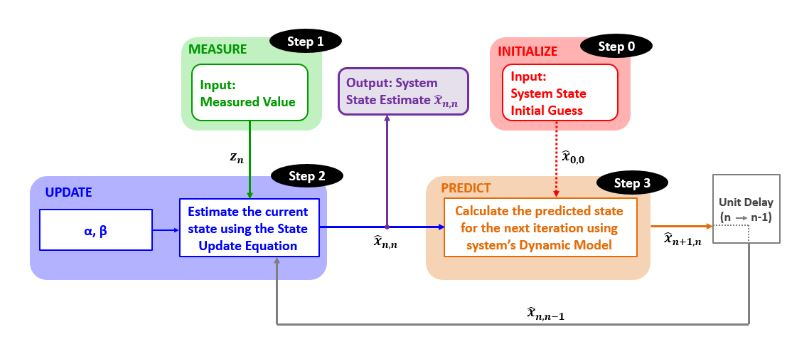

#### simple implementation for dynamic system
now will use the $\alpha - \beta$ filter

Example: aircraft distance in 1D

state-> $x_{n}$ - distance from the radar in time n

**dynamics**:

$x_{n+1}=x_{n}+dt*\dot{x}_{n}$

will assume constant velocity, thus:

$\dot{x}_{n+1}=\dot{x}_{n}$

* we ussually refer to the dynamic system of equations as:

**"State-Extrapolation-Equation"** or 

**"Transition-Equation"** or

**"Prediction-Equation"**

In [2]:
def estimation(alpha,beta,z,v0_prediction,x0_prediction,dt):
    v1_estimate=v0_prediction+beta*(z-x0_prediction)/dt
    x1_estimate=x0_prediction+alpha*(z-x0_prediction)
    
    return x1_estimate,v1_estimate
    

# imlementaion
dt=5 #[s]
alpha=0.2
beta=0.1
x0=30000 #[m]
v0=40 #[m/s]

## estimations and measurements
x_estimated=[]
x_predicted=[]
v_estimated=[]
v_predicted=[]
measurements=[30171,30353,\
             30756, 30799,\
             31018,31278,\
             31276,31379,\
             31748,32175]

## initial guest
x_estimated.append(30000) 
v_estimated.append(40) 




## estimate
for i in range(len(measurements)):
    
    # predict
    x_predicted.append(x_estimated[-1]+v_estimated[-1]*dt)
    v_predicted.append(v_estimated[-1])
    
    # state update
    x1_estimated,v1_estimated=estimation(alpha,\
                                      beta,\
                                      measurements[i],\
                                      v_predicted[-1],\
                                      x_predicted[-1],\
                                      dt)
    
    x_estimated.append(x1_estimated)
    v_estimated.append(v1_estimated)
    print('iter= ',i,', x_est=',"{0:0.2f}".format(x_estimated[-1]),', x_pred=',"{0:0.2f}".format(x_predicted[-1]))
    print('iter= ',i,', v_est=',"{0:0.2f}".format(v_estimated[-1]),', v_pred=',"{0:0.2f}".format(v_predicted[-1]))
    print()



iter=  0 , x_est= 30194.20 , x_pred= 30200.00
iter=  0 , v_est= 39.42 , v_pred= 40.00

iter=  1 , x_est= 30383.64 , x_pred= 30391.30
iter=  1 , v_est= 38.65 , v_pred= 39.42

iter=  2 , x_est= 30612.73 , x_pred= 30576.91
iter=  2 , v_est= 42.24 , v_pred= 38.65

iter=  3 , x_est= 30818.93 , x_pred= 30823.91
iter=  3 , v_est= 41.74 , v_pred= 42.24

iter=  4 , x_est= 31025.69 , x_pred= 31027.61
iter=  4 , v_est= 41.55 , v_pred= 41.74

iter=  5 , x_est= 31242.33 , x_pred= 31233.42
iter=  5 , v_est= 42.44 , v_pred= 41.55

iter=  6 , x_est= 31418.82 , x_pred= 31454.52
iter=  6 , v_est= 38.87 , v_pred= 42.44

iter=  7 , x_est= 31566.32 , x_pred= 31613.15
iter=  7 , v_est= 34.18 , v_pred= 38.87

iter=  8 , x_est= 31739.39 , x_pred= 31737.24
iter=  8 , v_est= 34.40 , v_pred= 34.18

iter=  9 , x_est= 31964.11 , x_pred= 31911.38
iter=  9 , v_est= 39.67 , v_pred= 34.40



### the $\alpha - \beta - \gamma$ filter
In this filter the acceleration is also been considered:

**dynamics**

$\hat{x}_{n+1,n}=\hat{x}_{n,n}+\hat{\dot{x}}_{n,n}*dt+\hat{\ddot{x}}_{n,n}*\frac{dt^{2}}{2}$

$\hat{\dot{x}}_{n+1,n}=\hat{\dot{x}}_{n,n}+\hat{\ddot{x}}_{n,n}*dt$

$\hat{\ddot{x}}_{n+1,n}=\hat{\ddot{x}}_{n,n}$

will get the following equations:
1. The State Update Equation for position:

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+\alpha_{n}(z_{n}-\hat{x}_{n,n-1})$

2. The State Update Equation for velocity:

$\hat{\dot{x}}_{n,n}=\hat{\dot{x}}_{n,n-1}+\beta(\frac{z_{n}-\hat{x}_{n,n-1}}{dt})$

2. The State Update Equation for acceleration:

$\hat{\ddot{x}}_{n,n}=\hat{\ddot{x}}_{n,n-1}+\gamma(\frac{z_{n}-\hat{x}_{n,n-1}}{0.5*dt^{2}})$


In [3]:
def estimation(alpha,beta,gamma,z,a0_prediction,v0_prediction,x0_prediction,dt):
    a1_estimate=a0_prediction+gamma*(z-x0_prediction)/(0.5*(dt**2))
    v1_estimate=v0_prediction+beta*(z-x0_prediction)/dt
    x1_estimate=x0_prediction+alpha*(z-x0_prediction)
    
    return x1_estimate,v1_estimate,a1_estimate
    

# imlementaion
dt=5 #[s]
alpha=0.5
beta=0.4
gamma=0.1
x0=30000 #[m]
v0=50 #[m/s]
a0=0 #[m/s^2]

## estimations and measurements
x_estimated=[]
x_predicted=[]
v_estimated=[]
v_predicted=[]
a_estimated=[]
a_predicted=[]
measurements=[30221,30453,\
             30906, 30999,\
             31368,31978,\
             32526,33379,\
             34698,36275]

## initial guest
x_estimated.append(x0) 
v_estimated.append(v0) 
a_estimated.append(a0) 




## estimate
for i in range(len(measurements)):
    
    # predict
    x_predicted.append(x_estimated[-1]+v_estimated[-1]*dt+a_estimated[-1]*(dt**2)/2)
    v_predicted.append(v_estimated[-1]+a_estimated[-1]*dt)
    a_predicted.append(a_estimated[-1])
    
    # state update
    x1_estimated,v1_estimated,a1_estimated=estimation(alpha,\
                                      beta,\
                                      gamma,\
                                      measurements[i],\
                                      a_predicted[-1],\
                                      v_predicted[-1],\
                                      x_predicted[-1],\
                                      dt)
    
    x_estimated.append(x1_estimated)
    v_estimated.append(v1_estimated)
    a_estimated.append(a1_estimated)
    print('iter= ',i,', x_est=',"{0:0.2f}".format(x_estimated[-1]),', x_pred=',"{0:0.2f}".format(x_predicted[-1]))
    print('iter= ',i,', v_est=',"{0:0.2f}".format(v_estimated[-1]),', v_pred=',"{0:0.2f}".format(v_predicted[-1]))
    print('iter= ',i,', a_est=',"{0:0.2f}".format(a_estimated[-1]),', a_pred=',"{0:0.2f}".format(a_predicted[-1]))
    print()



iter=  0 , x_est= 30235.50 , x_pred= 30250.00
iter=  0 , v_est= 47.68 , v_pred= 50.00
iter=  0 , a_est= -0.23 , a_pred= 0.00

iter=  1 , x_est= 30462.00 , x_pred= 30471.00
iter=  1 , v_est= 45.08 , v_pred= 46.52
iter=  1 , a_est= -0.38 , a_pred= -0.23

iter=  2 , x_est= 30794.35 , x_pred= 30682.70
iter=  2 , v_est= 61.06 , v_pred= 43.20
iter=  2 , a_est= 1.41 , a_pred= -0.38

iter=  3 , x_est= 31058.15 , x_pred= 31117.30
iter=  3 , v_est= 58.65 , v_pred= 68.12
iter=  3 , a_est= 0.46 , a_pred= 1.41

iter=  4 , x_est= 31362.60 , x_pred= 31357.21
iter=  4 , v_est= 61.84 , v_pred= 60.97
iter=  4 , a_est= 0.55 , a_pred= 0.46

iter=  5 , x_est= 31828.33 , x_pred= 31678.66
iter=  5 , v_est= 88.53 , v_pred= 64.59
iter=  5 , a_est= 2.95 , a_pred= 0.55

iter=  6 , x_est= 32416.91 , x_pred= 32307.81
iter=  6 , v_est= 120.71 , v_pred= 103.26
iter=  6 , a_est= 4.69 , a_pred= 2.95

iter=  7 , x_est= 33229.05 , x_pred= 33079.11
iter=  7 , v_est= 168.16 , v_pred= 144.17
iter=  7 , a_est= 7.09 , a_pred

### Summary: the $\alpha - \beta - \gamma$ filter

There are many types of α−β−(γ)
 filters, and they are based on the same principle:
 
* The current state estimation is based on the state update equations.
* The current state estimation is based on the state update equations.
* the parameters could be constant or adaptive

**differert** $\alpha - \beta - \gamma$ **filters**:

* Wiener Filter
* Bayes Filter
* Fading-memory polynomial Filter
* Expanding-memory (or growing-memory)
* polynomial Filter
* Least-squares Filter
* Benedict–Bordner Filter
* Lumped Filter
* Discounted least-squares α−β Filter
* Critically damped α−β Filter
* Growing-memory Filter
* Kalman Filter
* Extended Kalman Filter
* Unscented Kalman Filter
* Extended Complex Kalman Filter
* Gauss-Hermite Kalman Filter
* Cubature Kalman Filter
* Particle Filter

## Kalman filter 1D


### Kalman filter 1D without process noise

Like the $\alpha - \beta - \gamma$ filter, kalman steps comprises from:

1. measure
2. update
3. predict

kalman however treats measurements/estimations/predictions as normally distributed random variable(which can be described by mean and variance).
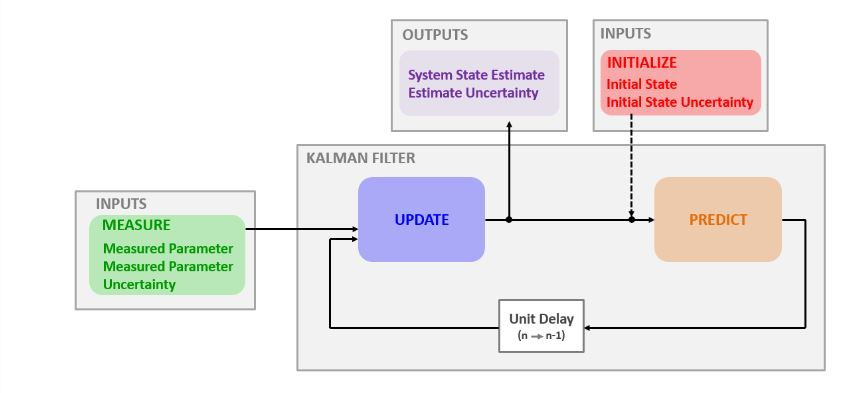

#### estimate as a random variable
The difference between the estimates and the true values  is the estimate error. the estimate error becomes lower as we make additional measurements, and it converges towards zero. We don't know the estimate error, but we can estimate the **state uncertainty**.

We denote the **state estimate variance** by **p**.

#### MEASUREMENT AS A RANDOM VARIABLE
The measurement errors are the differences between the measurements and the true values. Since the measurement errors are random, we can describe them by variance ( $\sigma^{2}$).
The standard deviation $\boldsymbol{\sigma}$ of the measurement errors is the **measurement uncertainty**.
 
We denote the **measurement variance** by **r**.

**r could be given by the sensor manufacture or derived empirically**

For advanced sensors like radar, the measurement uncertainty depends on several parameters such as SNR (Signal to Noise Ratio), beam width, bandwidth, time on target, clock stability, and more. Every radar measurement has a different SNR, beam width, and time on target. Therefore, the radar calculates the uncertainty of each measurement and reports it to the tracker.

#### STATE PREDICTION
The dynamic model equation depends on the system(radar velocity and range prediction for example).

Since Kalman Filter treats the estimate/prediction as a random variable, we must also extrapolate(predict) the estimation variance $\boldsymbol{p_{n,n}}$.

for the constant velocity radar tracking:

$p^{x}_{n+1,n}=p^{x}_{n,n}+dt^{2}*p^{v}_{n,n}$

$p^{v}_{n+1,n}=p^{v}_{n,n}$

$p^{x}$ - position estimate variance

$p^{v}$ - velocity estimate variance

* for normally ditribute random variable **x** with variance $\boldsymbol{\sigma^{2}}$ a random variable **kx** will have variance of $\boldsymbol{k^{2}\sigma^{2}}$

**we call the uncertainty prediction equations "Covariance Extrapolation Equation"**

#### STATE UPDATE
The estimation is a combination of 2 random variables:
1. the prediction done in the previous step
2. the measurement

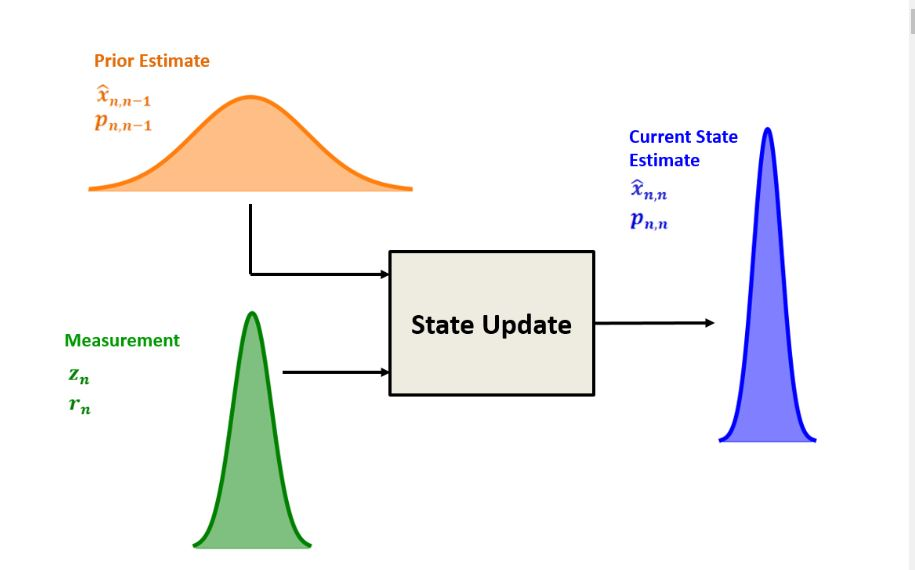

* The kalman is **optimal**, that means the estimation is done such that it minimizes the uncertainty of the current state estimate.

**equations**

$\hat{x}_{n,n}=\omega_{1}z_{n}+(1-\omega_{1})\hat{x}_{n,n-1}$

$p_{n,n}=\omega_{1}^{2}r_{n}+(1-\omega_{1})^{2}p_{n,n-1}$

- $p_{n,n}$ - the optimal variance of the of the current estimate
- $p_{n,n-1}$ - variance of the previous prediction
- $r_{n}$ - measurement variance

**the minimization of** $p_{n,n}$ **with respect to** $\omega_{1}$ 

$\frac{dp_{n,n}}{d\omega_{1}}=2\omega_{1}r_{n}-2(1-\omega_{1})p_{n,n-1}=0$

$\omega_{1}=\frac{p_{n,n-1}}{p_{n,n-1}+r_{n}}$

**so the kalman gain equation**

$K_{n}=\frac{p_{n,n-1}}{p_{n,n-1}+r_{n}}$

**and the equation for the current state estimate**

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+K_{n}(z_{n}-\hat{x}_{n,n-1})$

**and the equation the variance of the current state estimate**

$p_{n,n}=(1-K_{n})p_{n,n-1}$

#### PUTTING ALL TOGETHER
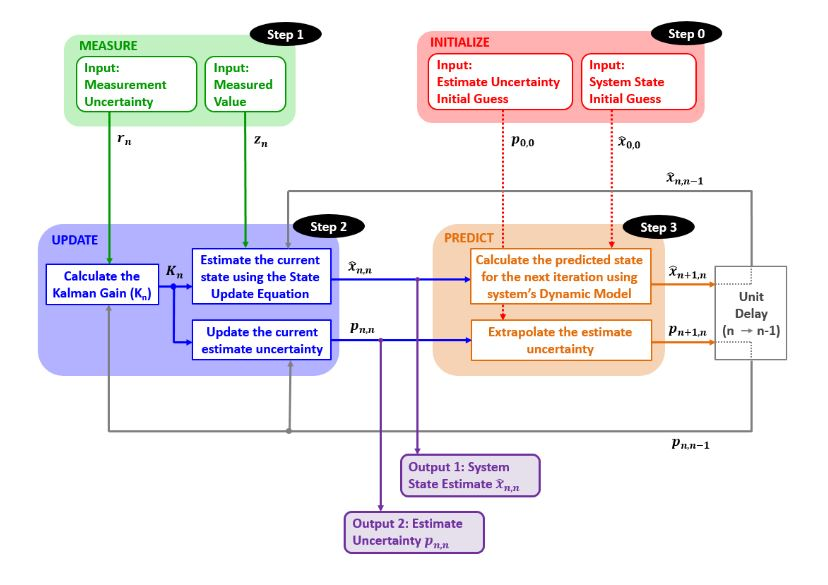

#### KALMAN GAIN INTUITION

$\hat{x}_{n,n}=\hat{x}_{n,n-1}+K_{n}(z_{n}-\hat{x}_{n,n-1})=$

$\boldsymbol{\hat{x}_{n,n}=(1-K_{n})\hat{x}_{n,n-1}+K_{n}z_{n}}$

So the kalman gain is **small** when the **measurement uncertainty is high** and the **estimate uncertainty is low**.
and a **big weight** is given to **the estimate** and a **small weight** to the **measurement**.

##### high kalman gain


##### low kalman gain

### Example
* building height is 50 [m].
* altimeter error standard deviation is 5 [m].
* measurements are: 49.03[m], 48.44[m], 55.21[m], 49.98[m], 50.6[m], 52.61[m], 45.87[m], 42.64[m], 48.26[m], 55.84[m].

47.09525031676866 55.18474968323134


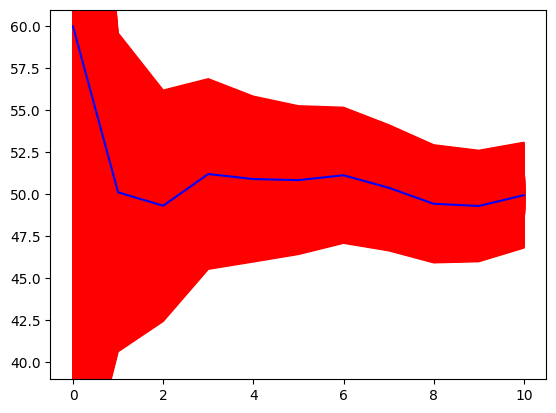

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# imlementaion
h0=60

## estimations and measurements
h_estimated=[]
h_predicted=[]
p_estimated=[]
p_predicted=[]

measurements=[49.03, 48.44,\
              55.21, 49.98,\
              50.6, 52.61,\
              45.87, 42.64,\
              48.26, 55.84]

## initial uncertainty
p0=225
r=25
    
## initial guest 
h_estimated.append(h0) 
p_estimated.append(p0) 




## estimate
for i in range(len(measurements)):
    
    # predict
    h_predicted.append(h_estimated[-1])
    p_predicted.append(p_estimated[-1])
    
    # state update
    ## kalman gain
    k=p_predicted[-1]/(p_predicted[-1]+r)
    
    h1_estimated=h_predicted[-1]+k*(measurements[i]-h_predicted[-1])
    p1_estimated=(1-k)*p_predicted[-1]
    
    h_estimated.append(h1_estimated)
    p_estimated.append(p1_estimated)
   
    print('iter= ',i,', h_est=',"{0:0.2f}".format(h_estimated[-1]),', h_pred=',"{0:0.2f}".format(h_predicted[-1]))
    print('iter= ',i,', p_est=',"{0:0.2f}".format(p_estimated[-1]),', p_pred=',"{0:0.2f}".format(p_predicted[-1]))
    print('iter= ',i,', k=',"{0:0.2f}".format(k))
    print()
    
## visulize
# define this data to be gaussian distributed with these standard 
# deviations
uncertainties = np.sqrt(p_estimated)

fig, ax = plt.subplots()


# plot the data centers on a line
ax.plot(range(len(measurements)+1),h_estimated, 'b') # blue to stand out from shading

numsigma = 2 # how many standard deviations to go out
numsteps = 100 # how many steps to take in shading

# go to shade the uncertainties between, out to 4 sigma
for i in range(1,numsteps+1):
    top = h_estimated + uncertainties/numsteps*i*numsigma
    bottom = h_estimated - uncertainties/numsteps*i*numsigma
    ax.fill_between(range(len(measurements)+1),bottom, top, color='r', 
        alpha=1.0)
alpha=1.0/numsteps
ax.set_ylim([39,61])
print(51.14-2*np.sqrt(4.09),51.14+2*np.sqrt(4.09))

### adding process noise

#### the complete model of the 1d kalman filter

##### the process noise
the process noise or **The uncertainty of the dynamic model** is the limitations( or unmodeled physics) of our model.

* we denote it by **q**(process noise variance).

will exam the covariance update equation(or Covariance Extrapolation Equation) again:

**for constant dynamics**

$p_{n+1,n}=p_{n,n}+q_{n}$

**for constant valocity**

$p_{n+1,n}^{x}=p_{n,n}^{x}+dt^{2}*p_{n,n}^{v}$

$p_{n+1,n}^{v}=p_{n,n}^{v}+q_{n}$

### Example1 - ESTIMATING THE TEMPERATURE OF THE LIQUID IN A TANK

$x_{n}=T+\omega_{n}$

T - constant temperature
$\omega_{n}$ - random process noise with variance q

- T=50
- q=0.0001
- r=0.1
- dt=5
- real temperature=[50.005, 49.994, 49.993, 50.001, 50.006, 49.998, 50.021, 50.005, 50, 49.997]
- measurements = [49.986, 49.963, 50.09, 50.001, 50.018, 50.05, 49.938, 49.858, 49.965, 50.114]

iter=  0
prediction[T,p]= 60.0000 10000.0001
measurement= 49.9860
gain=  1.0000
estimation[T,p]=  49.9860 0.0100

iter=  1
prediction[T,p]= 49.9860 0.0101
measurement= 49.9630
gain=  0.5025
estimation[T,p]=  49.9744 0.0050

iter=  2
prediction[T,p]= 49.9744 0.0051
measurement= 50.0900
gain=  0.3388
estimation[T,p]=  50.0136 0.0034

iter=  3
prediction[T,p]= 50.0136 0.0035
measurement= 50.0010
gain=  0.2586
estimation[T,p]=  50.0103 0.0026

iter=  4
prediction[T,p]= 50.0103 0.0027
measurement= 50.0180
gain=  0.2117
estimation[T,p]=  50.0120 0.0021

iter=  5
prediction[T,p]= 50.0120 0.0022
measurement= 50.0500
gain=  0.1815
estimation[T,p]=  50.0189 0.0018

iter=  6
prediction[T,p]= 50.0189 0.0019
measurement= 49.9380
gain=  0.1607
estimation[T,p]=  50.0059 0.0016

iter=  7
prediction[T,p]= 50.0059 0.0017
measurement= 49.8580
gain=  0.1458
estimation[T,p]=  49.9843 0.0015

iter=  8
prediction[T,p]= 49.9843 0.0016
measurement= 49.9650
gain=  0.1348
estimation[T,p]=  49.9817 0.0013

iter= 

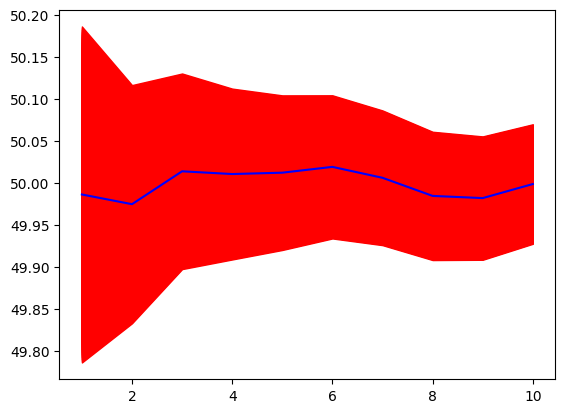

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# imlementaion
T0=60

## estimations and measurements
T_estimated=[]
T_predicted=[]
p_estimated=[]
p_predicted=[]

measurements=[49.986, 49.963,\
              50.09, 50.001,\
              50.018, 50.05,\
              49.938, 49.858,\
              49.965, 50.114]

## initial uncertainty
p0=10000
r=0.01
q=0.0001
dt=5
    
## initial guest 
T_estimated.append(T0) 
p_estimated.append(p0) 




## estimate
for i in range(len(measurements)):
    
    # predict
    T_predicted.append(T_estimated[-1])
    p_predicted.append(p_estimated[-1]+q)
    
    # state update
    ## kalman gain
    k=p_predicted[-1]/(p_predicted[-1]+r)
    
    T1_estimated=T_predicted[-1]+k*(measurements[i]-T_predicted[-1])
    p1_estimated=(1-k)*p_predicted[-1]
    
    T_estimated.append(T1_estimated)
    p_estimated.append(p1_estimated)
   
    print('iter= ',i)
    print('prediction[T,p]=',"{0:0.4f}".format(T_predicted[-1]),"{0:0.4f}".format(p_predicted[-1]))
    print('measurement=',"{0:0.4f}".format(measurements[i]))
    print('gain= ',"{0:0.4f}".format(k))
    print('estimation[T,p]= ',"{0:0.4f}".format(T_estimated[-1]),"{0:0.4f}".format(p_estimated[-1]))
    print()
    
## visulize
# define this data to be gaussian distributed with these standard 
# deviations
uncertainties = np.sqrt(p_estimated[1:])

fig, ax = plt.subplots()


# plot the data centers on a line
ax.plot(range(1,len(measurements)+1),T_estimated[1:], 'b') # blue to stand out from shading

numsigma = 2 # how many standard deviations to go out
numsteps = 100 # how many steps to take in shading

# go to shade the uncertainties between, out to 4 sigma
for i in range(1,numsteps+1):
    top = T_estimated[1:] + uncertainties/numsteps*i*numsigma
    bottom = T_estimated[1:] - uncertainties/numsteps*i*numsigma
    ax.fill_between(range(1,len(measurements)+1),bottom, top, color='r', 
        alpha=1.0)
alpha=1.0/numsteps
# ax.set_ylim([39,61])


### Example2 - ESTIMATING THE TEMPERATURE OF HEATING LIQUID IN A TANK

* the tank is heating in about 0.1 [C/s]
* we wont model the heating , will just increase the process error
$x_{n}=T+*dt+\omega_{n}$

T - constant temperature
$\omega_{n}$ - random process noise with variance q

- T=50
- q=0.15
- r=0.1
- dt=5
- real temperature=[50.505oC
, 50.994oC
, 51.493oC
, 52.001oC
, 52.506oC
, 52.998oC
, 53.521oC
, 54.005oC
, 54.5oC
, and 54.997oC
.]
- measurements = [50.486oC
, 50.963oC
, 51.597oC
, 52.001oC
, 52.518oC
, 53.05oC
, 53.438oC
, 53.858oC
, 54.465oC
, and 55.114oC
.]

iter=  0
prediction[T,p]= 10.0000 10000.1500
measurement= 50.4860
gain=  1.0000
estimation[T,p]=  50.4860 0.0100

iter=  1
prediction[T,p]= 50.4860 0.1600
measurement= 50.9630
gain=  0.9412
estimation[T,p]=  50.9349 0.0094

iter=  2
prediction[T,p]= 50.9349 0.1594
measurement= 51.5970
gain=  0.9410
estimation[T,p]=  51.5579 0.0094

iter=  3
prediction[T,p]= 51.5579 0.1594
measurement= 52.0010
gain=  0.9410
estimation[T,p]=  51.9748 0.0094

iter=  4
prediction[T,p]= 51.9748 0.1594
measurement= 52.5180
gain=  0.9410
estimation[T,p]=  52.4859 0.0094

iter=  5
prediction[T,p]= 52.4859 0.1594
measurement= 53.0500
gain=  0.9410
estimation[T,p]=  53.0167 0.0094

iter=  6
prediction[T,p]= 53.0167 0.1594
measurement= 53.4380
gain=  0.9410
estimation[T,p]=  53.4131 0.0094

iter=  7
prediction[T,p]= 53.4131 0.1594
measurement= 53.8580
gain=  0.9410
estimation[T,p]=  53.8317 0.0094

iter=  8
prediction[T,p]= 53.8317 0.1594
measurement= 54.4650
gain=  0.9410
estimation[T,p]=  54.4276 0.0094

iter= 

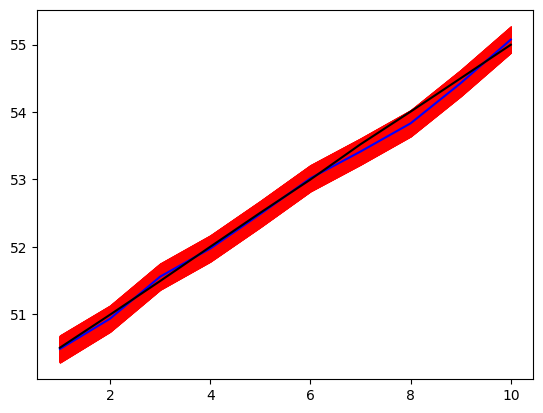

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# imlementaion
T0=10

## estimations and measurements
T_estimated=[]
T_predicted=[]
p_estimated=[]
p_predicted=[]

measurements=[50.486, 50.963,\
              51.597, 52.001,\
              52.518, 53.05,\
              53.438, 53.858,\
              54.465, 55.114]

real_values=[50.505, 50.994,\
             51.493, 52.001,\
             52.506, 52.998,\
             53.521, 54.005,\
             54.5, 54.997]

## initial uncertainty
p0=10000
r=0.01
q=0.15
dt=5
    
## initial guest 
T_estimated.append(T0) 
p_estimated.append(p0) 




## estimate
for i in range(len(measurements)):
    
    # predict
    T_predicted.append(T_estimated[-1])
    p_predicted.append(p_estimated[-1]+q)
    
    # state update
    ## kalman gain
    k=p_predicted[-1]/(p_predicted[-1]+r)
    
    T1_estimated=T_predicted[-1]+k*(measurements[i]-T_predicted[-1])
    p1_estimated=(1-k)*p_predicted[-1]
    
    T_estimated.append(T1_estimated)
    p_estimated.append(p1_estimated)
   
    print('iter= ',i)
    print('prediction[T,p]=',"{0:0.4f}".format(T_predicted[-1]),"{0:0.4f}".format(p_predicted[-1]))
    print('measurement=',"{0:0.4f}".format(measurements[i]))
    print('gain= ',"{0:0.4f}".format(k))
    print('estimation[T,p]= ',"{0:0.4f}".format(T_estimated[-1]),"{0:0.4f}".format(p_estimated[-1]))
    print()
    
## visulize
# define this data to be gaussian distributed with these standard 
# deviations
uncertainties = np.sqrt(p_estimated[1:])

fig, ax = plt.subplots()


# plot the data centers on a line
ax.plot(range(1,len(measurements)+1),T_estimated[1:], 'b') # blue to stand out from shading
ax.plot(range(1,len(measurements)+1),real_values, 'k') # blue to stand out from shading

numsigma = 2 # how many standard deviations to go out
numsteps = 100 # how many steps to take in shading

# go to shade the uncertainties between, out to 4 sigma
for i in range(1,numsteps+1):
    top = T_estimated[1:] + uncertainties/numsteps*i*numsigma
    bottom = T_estimated[1:] - uncertainties/numsteps*i*numsigma
    ax.fill_between(range(1,len(measurements)+1),bottom, top, color='r', 
        alpha=1.0)
alpha=1.0/numsteps
# ax.set_ylim([39,61])
